# Getting deeper with Keras
* Tensorflow is a powerful and flexible tool, but coding large neural architectures with it is tedious.
* There are plenty of deep learning toolkits that work on top of it like Slim, TFLearn, Sonnet, Keras.
* Choice is matter of taste and particular task
* We'll be using Keras

In [122]:
# LOAD DATASET
import numpy as np
import keras

def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

    # normalize x
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.

    # we reserve the last 10000 training examples for validation
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]

    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])

    return X_train, y_train, X_val, y_val, X_test, y_test

# CROSS-VALIDATION
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset(False)
y_train,y_val,y_test = map(keras.utils.np_utils.to_categorical,[y_train,y_val,y_test])

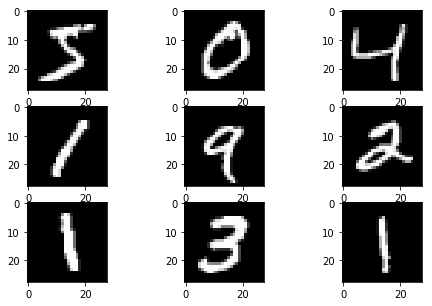

In [123]:
plt.figure(figsize=(8,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')

## The pretty keras

In [130]:
### 1. Tensorflow
import tensorflow as tf
s = tf.InteractiveSession()
#tf.reset_default_graph()

### 2. Keras API over Tensorflow
import keras
from keras.models import Sequential
import keras.layers as ll

model = Sequential()

### 4. Input layer
model.add(ll.InputLayer([28, 28]))
model.add(ll.Dropout(0.3))
model.add(ll.Flatten())

### 5. Hidden Layers using the ReLU activation function
model.add(ll.Dense(200))  # 250 hidden units
model.add(ll.Dropout(0.2))
model.add(ll.Activation('relu'))

model.add(ll.Dense(200))
model.add(ll.Dropout(0.3))
model.add(ll.Activation('relu'))

### 6. Output layer
model.add(ll.Dense(10, activation='softmax'))

### 7. Crossentropy loss function optimized with the Adam Gradient Descent Optimizer
model.compile("adam", "categorical_crossentropy", metrics=["accuracy"])

### 8. Model architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 28, 28)            0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 28, 28)            0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 200)               157000    
_________________________________________________________________
dropout_24 (Dropout)         (None, 200)               0         
_________________________________________________________________
activation_21 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 200)               40200     
__________

### Model interface

Keras models follow __Scikit-learn__'s interface of fit/predict with some notable extensions. Let's take a tour.

In [131]:
import time
epochs = 10
start = time.time()

# Training neural network
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=300)

print("Training completed\n\nTotal elapsed time is {:.4f} seconds".format(time.time() - start))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s - loss: 0.6196 - acc: 0.8059 - val_loss: 0.1998 - val_acc: 0.9419
Epoch 2/10
50000/50000 [==============================] - 3s - loss: 0.2825 - acc: 0.9145 - val_loss: 0.1434 - val_acc: 0.9594
Epoch 3/10
50000/50000 [==============================] - 3s - loss: 0.2202 - acc: 0.9336 - val_loss: 0.1156 - val_acc: 0.9664
Epoch 4/10
50000/50000 [==============================] - 3s - loss: 0.1849 - acc: 0.9422 - val_loss: 0.0993 - val_acc: 0.9711
Epoch 5/10
50000/50000 [==============================] - 3s - loss: 0.1658 - acc: 0.9477 - val_loss: 0.0891 - val_acc: 0.9731
Epoch 6/10
50000/50000 [==============================] - 3s - loss: 0.1446 - acc: 0.9548 - val_loss: 0.0820 - val_acc: 0.9762
Epoch 7/10
50000/50000 [==============================] - 3s - loss: 0.1346 - acc: 0.9583 - val_loss: 0.0784 - val_acc: 0.9772
Epoch 8/10
50000/50000 [==============================] - 3s 

In [132]:
print("\nLoss, Accuracy = ", model.evaluate(X_test, y_test))

 9664/10000 [===========================>..] - ETA: 0s
Loss, Accuracy =  [0.07218290108521469, 0.97809999999999997]


### Check model efficient

In [133]:
# Test score...
test_predictions = model.predict_proba(X_test).argmax(axis=-1)
test_answers = y_test.argmax(axis=-1)

test_accuracy = np.mean(test_predictions==test_answers)

print("\nTest accuracy: {} %".format(test_accuracy*100))

assert test_accuracy>=0.92,"Logistic regression can do better!"
assert test_accuracy>=0.975,"Your network can do better!"
print("Great job!")

 9504/10000 [===========================>..] - ETA: 0s
Test accuracy: 97.81 %
Great job!


# Tips & tricks

Here are some tips on what you could do. Don't worry, to reach the passing threshold you don't need to try all the ideas listed here, feel free to stop once you reach the 0.975 accuracy mark.

 * __Network size__
   * More neurons, 
   * More layers, ([docs](https://keras.io/))

   * Nonlinearities in the hidden layers
     * tanh, relu, leaky relu, etc
   * Larger networks may take more epochs to train, so don't discard your net just because it could didn't beat the baseline in 5 epochs.


 * __Early Stopping__
   * Training for 100 epochs regardless of anything is probably a bad idea.
   * Some networks converge over 5 epochs, others - over 500.
   * Way to go: stop when validation score is 10 iterations past maximum
     

 * __Faster optimization__
   * rmsprop, nesterov_momentum, adam, adagrad and so on.
     * Converge faster and sometimes reach better optima
     * It might make sense to tweak learning rate/momentum, other learning parameters, batch size and number of epochs


 * __Regularize__ to prevent overfitting
   * Add some L2 weight norm to the loss function, theano will do the rest
     * Can be done manually or via - https://keras.io/regularizers/
   
   
 * __Data augmemntation__ - getting 5x as large dataset for free is a great deal
   * https://keras.io/preprocessing/image/
   * Zoom-in+slice = move
   * Rotate+zoom(to remove black stripes)
   * any other perturbations
   * Simple way to do that (if you have PIL/Image): 
     * ```from scipy.misc import imrotate,imresize```
     * and a few slicing
   * Stay realistic. There's usually no point in flipping dogs upside down as that is not the way you usually see them.